### Notebook : Analyse et Manipulation de Données

Le jeu de données contenu dans data.csv est un ensemble de relevés de vélos partagés (type
Vélib). On cherche à prédire le nombre de vélos loués par heure dans la ville (variable count ). Voici
une description des données :

**datetime** - date et heure du relevé <br/>
**season** - 1 = printemps , 2 = été, 3 = automne, 4 = hiver <br/>
**holiday** – indique si le jour est un jour de vacances scolaires <br/>
**workingday** - indique si le jour est travaillé (ni weekend ni vacances) <br/>
**weather** - 1: Dégagé à nuageux, 2 : Brouillard, 3 : Légère pluie ou neige, 4 : Fortes averses ou neiges <br/>
**temp** – température en degrés Celsius <br/>
**atemp** – température ressentie en degrés Celsius <br/>
**humidity** – taux d’humidité <br/>
**windspeed** – vitesse du vent <br/>
**casual** - nombre de locations d’usagers non abonnés <br/>
**registered** – nombre de locations d’usagers abonnés <br/>
**count** – nombre total de locations de vélos <br/>

## Partie I – Statistiques descriptives

Regardons les facteurs qui semblent influencer la demande en vélos

### chargement des données et transformation de quelques features

In [86]:
import sys
print(sys.version)

3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
data=pd.read_csv("data.csv",sep=";")

# formatter la colonne datetime
data["datetime"]=pd.to_datetime(data["datetime"],format="%d/%m/%Y %H:%M")

# création d'une nouvelle colonne hour (de 0 à 23)
data['hour'] = data["datetime"].apply(lambda x: x.hour)
data["night"]=data["datetime"].apply(lambda x: x.hour in (23,0,1,2,3,4,5)).astype(int)
data["morning"]=data["datetime"].apply(lambda x: x.hour in (6,7,8,9,10)).astype(int)
data["afternoon"]=data["datetime"].apply(lambda x: x.hour in (11,12,13,14,15)).astype(int)
data["afterwork"]=data["datetime"].apply(lambda x: x.hour in (16,17,18,19)).astype(int) 
data["evening"]=data["datetime"].apply(lambda x: x.hour in (20,21,22)).astype(int)

# les saisons indiquées par la colonne season ne correspondaient pas à la 
# réalité (le printemps ne démarre pas le 1er janvier)
# création de 4 colonnes (dummy variables) représentant chaque saison

data["winter"]=data["datetime"].apply(lambda x: x.month in (12,1,2)).astype(int)
data["spring"]=data["datetime"].apply(lambda x: x.month in (3,4,5)).astype(int)
data["summer"]=data["datetime"].apply(lambda x: x.month in (6,7,8)).astype(int) 
data["autumn"]=data["datetime"].apply(lambda x: x.month in (9,10,11)).astype(int)

#jours de la semaine : 0 est lundi, 6 est dimanche
data['dayofweek'] = data.datetime.dt.dayofweek

# dummy variables pour la colonne weather
dummy = pd.get_dummies(data["weather"], prefix="weather", dummy_na=False)
dummy.columns = ["beau_temps","nuageux","pluie_neige","mauvais_temps"]
data = data.join(dummy.loc[:, :])

# création d'une variable ("timediff") qui compte le nombre de jours écoulés depuis le 1er janvier 2011
earliest = data["datetime"].min()
data['timediff'] = data['datetime'].apply(lambda x: x - earliest).astype('timedelta64[D]').astype(int) + 1

In [89]:
data.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,winter,spring,summer,autumn,dayofweek,beau_temps,nuageux,pluie_neige,mauvais_temps,timediff
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,1,0,0,0,5,1,0,0,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,1,0,0,0,5,1,0,0,0,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,1,0,0,0,5,1,0,0,0,1


In [90]:
data.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,winter,spring,summer,autumn,dayofweek,beau_temps,nuageux,pluie_neige,mauvais_temps,timediff
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,1,0,0,0,5,1,0,0,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,1,0,0,0,5,1,0,0,0,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,1,0,0,0,5,1,0,0,0,1


In [91]:
data.shape[1]

28

In [92]:
data.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,winter,spring,summer,autumn,dayofweek,beau_temps,nuageux,pluie_neige,mauvais_temps,timediff
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,1,0,0,0,5,1,0,0,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,1,0,0,0,5,1,0,0,0,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,1,0,0,0,5,1,0,0,0,1


#### en regardant le dataset, on se rend compte que la colonne holiday présente des erreurs (des jours qui sont des vacances ne sont pas indiqués).
#### On remarque également que des dates sont manquantes et que des horaires sont manquantes, on quantifierai ces valeurs plus loin dans l'exposé

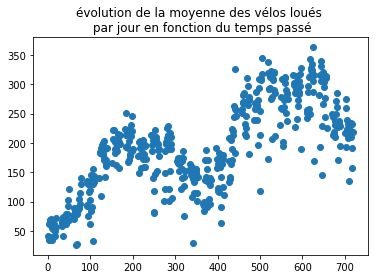

In [93]:
# voici un exemple de scatter plot qui permet de voir comment evolue le nombre de vélos loués en fonction d'un feature
# ici, en fonction du temps passé

# On crée un nouveau dataframe avec pour chaque jour la moyenne des vélos loués
groups=data.groupby(["timediff"])
timediff_count=pd.DataFrame(columns=['timediff','count'])
i=0
for key,df in groups:
    timediff_count.loc[i]=[key,df["count"].mean()]
    i=i+1

#affichage du graphe
plt.title("évolution de la moyenne des vélos loués \n par jour en fonction du temps passé")
plt.scatter(timediff_count["timediff"],timediff_count["count"])
plt.show()

#### on constate une évolution du nombre moyen de vélos loués : il y a une popularité croissante de la location de vélos 

# remarques sur le jeu de données

In [94]:
data.columns.values.tolist();

In [95]:
# pour accéder aux statistiques descriptives des colonnes, j'utilise la fonction describe() pour les features continus
feature_continu=['holiday','workingday','temp','atemp','humidity','windspeed','casual','registered','beau_temps','nuageux','pluie_neige','mauvais_temps','count']
print("cases vides: ", data.isnull().sum())
data[feature_continu].describe()

cases vides:  datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual           0
registered       0
count            0
hour             0
night            0
morning          0
afternoon        0
afterwork        0
evening          0
winter           0
spring           0
summer           0
autumn           0
dayofweek        0
beau_temps       0
nuageux          0
pluie_neige      0
mauvais_temps    0
timediff         0
dtype: int64


,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,beau_temps,nuageux,pluie_neige,mauvais_temps,count
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,0.660665,0.260334,0.078909,0.000092,191.574132
std,0.166599,0.466159,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,0.473505,0.438837,0.269609,0.009584,181.144454
min,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,0.000000,0.000000,0.000000,0.000000,42.000000
50%,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,1.000000,0.000000,0.000000,0.000000,145.000000
75%,0.000000,1.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,1.000000,1.000000,0.000000,0.000000,284.000000
max,1.000000,1.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,1.000000,1.000000,1.000000,1.000000,977.000000


### la première remarque qui peut être faite au vu de ces données et qu'il y a beaucoup de vacances scolaires qui n'ont pas été comptabilisées (2,8% des jours sont des vacances dans le dataset). La colonne mauvais temps est binaire et ne prend la valeur 1 qu'une seule fois dans le dataset.  Il n'y a pas de données manquantes. J'étais surpris de voir qu'il y avait des heures pour lesquelles 0 vélo était loué par des registered, mais ces lignes du jeu de données correspondent à des heures tardives de la nuit avec une forte humidité. 


# remarques sur certains features et leurs liens avec la variable "count"

### weather

In [96]:
# statistiques en fonction du temps météorologique
groups=data.groupby(["weather"])
avg_count=pd.DataFrame(columns=['weather','occurrence','moy_count','median_count','standard déviation'])
i=0
for key,df in groups:
    avg_count.loc[i]=[key,df["weather"].count(),df["count"].mean(),df["count"].median(),df["count"].std()]
    i=i+1

In [97]:
avg_count

,weather,occurrence,moy_count,median_count,standard déviation
0,1.0,7192.0,205.236791,161.0,187.959566
1,2.0,2834.0,178.955540,134.0,168.366413
2,3.0,859.0,118.846333,71.0,138.581297
3,4.0,1.0,164.000000,164.0,NaN


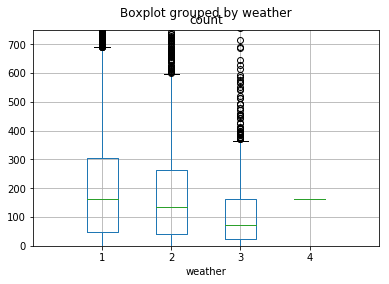

In [98]:
data.boxplot(column='count', by='weather')
plt.axis([0, 5, 0, 750])
plt.show()

### on remarque que le temps "4" n'apparaît qu'une seule fois dans tout le dataset le nombre de vélos loués pour ce temps est cependant plus élevé que la moyenne des vélos loués pour le temps 3. Etant donné qu'il n'apparaît qu'une seule fois, On va considérer uniquement les temps 1,2 et 3 dans la suite. Sans surprise, quand il fait beau la variable count a la moyenne la plus élevée.

### season

In [99]:
# nouveau dataframe avec une ligne par saison et le nombre moyen de vélos loués pour chaque saison
groups=data.groupby(["season"])
avg_count=pd.DataFrame(columns=['season','occurence','moy_count','median_count'])
i=0
for key,df in groups:
    avg_count.loc[i]=[key,df["weather"].count(),df["count"].mean(),df["count"].median()]
    i=i+1

#### NB : dans le reste du code on n'utilisera plus cette colonne qui ne représente pas les vraies saisons de l'année, j'utiliserai les 4 nouvelles colonnes créées pour chaque saison


In [100]:
avg_count

,season,occurence,moy_count,median_count
0,1.0,2686.0,116.343261,78.0
1,2.0,2733.0,215.251372,172.0
2,3.0,2733.0,234.417124,195.0
3,4.0,2734.0,198.988296,161.0


### variable count : la variable à expliquer

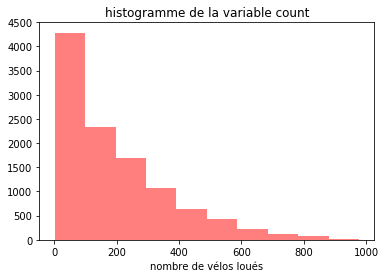

In [101]:
from matplotlib import pyplot as plt

plt.hist(data["count"],color="red",alpha=0.5)
plt.title("histogramme de la variable count")
plt.xlabel("nombre de vélos loués")
plt.show()

### comparer l'attitude des casuals et des registered

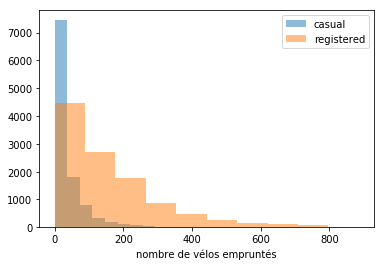

In [102]:
# On distingue ici les "casual" et "registered" en ce qui concerne le nombre de vélos emprunter par heure
plt.hist(data["casual"],alpha=0.5, label='casual')
plt.hist(data["registered"],alpha=0.5, label='registered')
plt.legend(loc='upper right')
plt.xlabel("nombre de vélos empruntés")
plt.show()


#### comportement des utilisateurs en fonction du temps qu'il fait

si le temps est 1 alors nous avons les statistiques suivantes :
count    7192.000000
mean      205.236791
std       187.959566
min         1.000000
25%        48.000000
50%       161.000000
75%       305.000000
max       977.000000
Name: count, dtype: float64


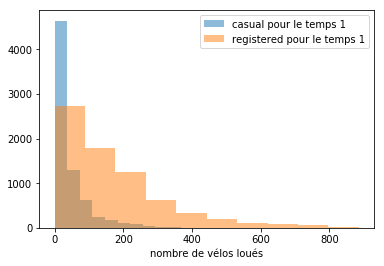

si le temps est 2 alors nous avons les statistiques suivantes :
count    2834.000000
mean      178.955540
std       168.366413
min         1.000000
25%        41.000000
50%       134.000000
75%       264.000000
max       890.000000
Name: count, dtype: float64


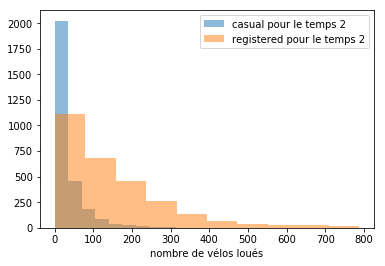

si le temps est 3 alors nous avons les statistiques suivantes :
count    859.000000
mean     118.846333
std      138.581297
min        1.000000
25%       23.000000
50%       71.000000
75%      161.000000
max      891.000000
Name: count, dtype: float64


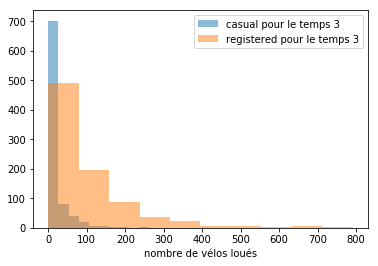

In [103]:
# j'ai exclu le temps 4 car il n'y en a qu'une donnée
for i in range(1,4): 
    print("si le temps est %s alors nous avons les statistiques suivantes :"%i)
    print(data[data["weather"]==i]["count"].describe())
    plt.hist(data[data["weather"]==i]["casual"],alpha=0.5, label='casual pour le temps %s'%i)
    plt.hist(data[data["weather"]==i]["registered"],alpha=0.5, label='registered pour le temps %s'%i)
    plt.legend(loc='upper right')
    plt.xlabel("nombre de vélos loués")
    plt.show()
    

##### ces graphes permettent d'avoir un aperçu du comportement des utilisateurs : si l'utilisateur est "casual" il emprunte généralement un petit nombre de vélos. S'il est "registered" il emprunte généralement un plus grand nombre de vélos par heure. Les "casual "sont plus sensibles au temps qu'il fait, le nombre de vélos loués chute drastiquement si le temps est mauvais. On remarque une baisse également chez les registered, mais pas aussi drastique. Le graphe ci-dessous représent la variable count en fonction du temps qu'il fait.

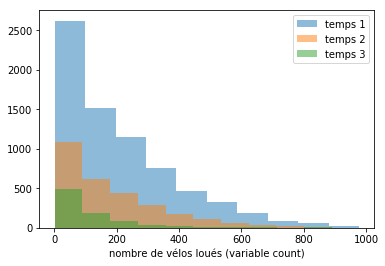

In [104]:
plt.hist(data[data["weather"]==1]["count"],alpha=0.5, label='temps 1')
plt.hist(data[data["weather"]==2]["count"],alpha=0.5, label='temps 2')
plt.hist(data[data["weather"]==3]["count"],alpha=0.5, label='temps 3')
plt.legend(loc='upper right')
plt.xlabel("nombre de vélos loués (variable count)")
plt.show()

## comportement des utilisateurs en fonction de la saison

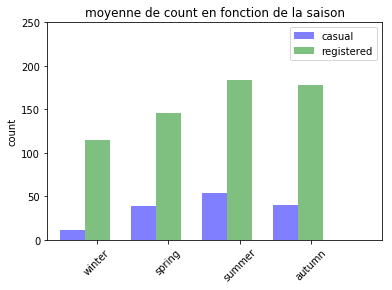

In [105]:
cas_1=data[data["winter"]==1]["casual"]
cas_2=data[data["spring"]==1]["casual"]
cas_3=data[data["summer"]==1]["casual"]
cas_4=data[data["autumn"]==1]["casual"]

reg_1=data[data["winter"]==1]["registered"]
reg_2=data[data["spring"]==1]["registered"]
reg_3=data[data["summer"]==1]["registered"]
reg_4=data[data["autumn"]==1]["registered"]

fig = plt.figure()
ax = fig.add_subplot(111)


N = 4
casual = [cas_1.mean(), cas_2.mean(),cas_3.mean(),cas_4.mean()]
registered = [reg_1.mean(), reg_2.mean(),reg_3.mean(),reg_4.mean()]


ind = np.arange(N)                
width = 0.35                      


rects1 = ax.bar(ind, casual, width,
                color='blue',alpha=0.5,
                error_kw=dict(elinewidth=2,ecolor='green'))

rects2 = ax.bar(ind+width, registered, width,
                    color='green',alpha=0.5,
                    error_kw=dict(elinewidth=2,ecolor='blue'))


ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,250)
ax.set_ylabel('count')
ax.set_title('moyenne de count en fonction de la saison')
xTickMarks = ["winter","spring","summer","autumn"]
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('casual', 'registered') )

plt.show()

##### on voit que les casuals prennent très peu le vélo en hiver et beaucoup plus en été. l'évolution n'est pas drastique pour les registered mais notable. On peut quantifier cette évolution du nombre de vélos loués en fonction de la saison :


In [106]:
print(" pour les casuals le nombre de vélos loués est multiplié par :\n", "entre printemps et hiver :",data[data["spring"]==1]["casual"].mean()/data[data["winter"]==1]["casual"].mean(),
 "\n entre été et printemps :",data[data["summer"]==1]["casual"].mean()/data[data["spring"]==1]["casual"].mean(),
"\n entre automne et été :",data[data["autumn"]==1]["casual"].mean()/data[data["summer"]==1]["casual"].mean())
print("\n\n pour les registered le nombre de vélos loués est multiplié par :\n", "entre printemps et hiver :",data[data["spring"]==1]["registered"].mean()/data[data["winter"]==1]["registered"].mean(),
 "\n entre été et printemps :",data[data["summer"]==1]["registered"].mean()/data[data["spring"]==1]["registered"].mean(),
"\n entre automne et été :",data[data["autumn"]==1]["registered"].mean()/data[data["summer"]==1]["registered"].mean())

 pour les casuals le nombre de vélos loués est multiplié par :
 entre printemps et hiver : 3.365836882386408 
 entre été et printemps : 1.3626150706019402 
 entre automne et été : 0.7534247987423632


 pour les registered le nombre de vélos loués est multiplié par :
 entre printemps et hiver : 1.2707338166232025 
 entre été et printemps : 1.2684320404235236 
 entre automne et été : 0.9691717132025429


## comportement des utilisateurs au regard des workindday

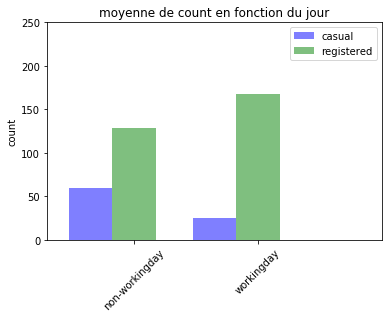

In [107]:
#workingday
cas_0=data[data["workingday"]==0]["casual"]
cas_1=data[data["workingday"]==1]["casual"]

reg_0=data[data["workingday"]==0]["registered"]
reg_1=data[data["workingday"]==1]["registered"]

fig = plt.figure()
ax = fig.add_subplot(111)

## the data
N = 2
casual = [cas_0.mean(), cas_1.mean()]
registered = [reg_0.mean(), reg_1.mean()]

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.35                      # the width of the bars

## the bars
rects1 = ax.bar(ind, casual, width,
                color='blue',alpha=0.5,
                error_kw=dict(elinewidth=2,ecolor='green'))

rects2 = ax.bar(ind+width, registered, width,
                    color='green',alpha=0.5,
                    error_kw=dict(elinewidth=2,ecolor='blue'))

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,250)
ax.set_ylabel('count')
ax.set_title('moyenne de count en fonction du jour')
xTickMarks = ['non-workingday','workingday']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('casual', 'registered') )

plt.show()


##### on voit que lorsque c'est un jour de travail, les registered prennent plus le vélo que lorsque c'est un jour de repos et que c'est l'inverse pour les casuals, ce qui semble cohérent vu que les gens qui vont au travail en vélo sont probablement des registered

### la colonne timediff

In [108]:
# des sauts dans les horaires
# des sauts dans les dates

groups=data.groupby(["timediff"])
timediff_count=pd.DataFrame(columns=['timediff',"nombre d'horaires dans la journée"])
i=0
for key,df in groups:
    timediff_count.loc[i]=[key,df["timediff"].count()]
    i=i+1


In [109]:
timediff_count.head(6)

,timediff,nombre d'horaires dans la journée
0,1,24
1,2,23
2,3,22
3,4,23
4,5,23
5,6,23


In [110]:
# il y a des journées avec seulement 12 horaires répertoriées
timediff_count["nombre d'horaires dans la journée"].min()

12

In [111]:
print(timediff_count['timediff'].describe())
# des lignes sont manquantes (il y a des sauts dans les dates)
n=0
for i in range(0,455):
    if timediff_count['timediff'][i+1]-timediff_count["timediff"][i]>1:
        n=n+timediff_count['timediff'][i+1]-timediff_count["timediff"][i]

print(" \n\n nombre de jours manquants dans le dataset :",n,"jours")
## on peut aussi voir qu'il y a des sauts dans les horaires pour certaines dates (moins de 24 heures répertoriées dans la journée)

count     456
unique    456
top       719
freq        1
Name: timediff, dtype: int64
 

 nombre de jours manquants dans le dataset : 286 jours


# quelles colonnes semblent expliquer la variable "count" ?

## quelques graphes

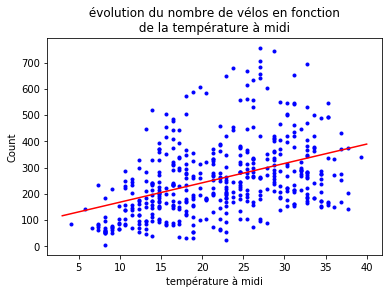

In [112]:
#temperature à midi
midi=data[data['hour']==12]

X=np.array(midi['temp'])[:,np.newaxis]

Y=np.array(midi['count'])[:,np.newaxis]
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(X,Y)
mini=3
maxi=40
x_axis=np.linspace(mini,maxi,100)[:,np.newaxis]

X=[midi['temp']]
Y=[midi['count']]
plt.plot(X,Y,'k.',color="Blue")
plt.ylabel('Count')
plt.xlabel("température à midi")

plt.plot(x_axis,model.predict(x_axis),'-r')
plt.title(" évolution du nombre de vélos en fonction \n de la température à midi ")

plt.show()

#### sans surprise, une augmentation de la température entraine une augmentation du nombre de vélos loués.  Dans la suite on va quantifier l'influence de chaque variable sur le nombre de vélos loués

# regression linéaire multiple sur des features sélectionnés

In [113]:
data.columns.values.tolist();

In [114]:
# drop colonne : "temp", le feature atemp semble plus pertinent pour la suite
feature_list =['holiday','workingday','atemp','humidity','windspeed','night','morning',
 'afternoon','afterwork','evening','winter',
 'spring','summer','autumn','timediff', 'beau_temps','nuageux','pluie_neige','mauvais_temps']
len(feature_list)

19

In [115]:
# regression linéaire
from sklearn import linear_model
model=linear_model.LinearRegression()

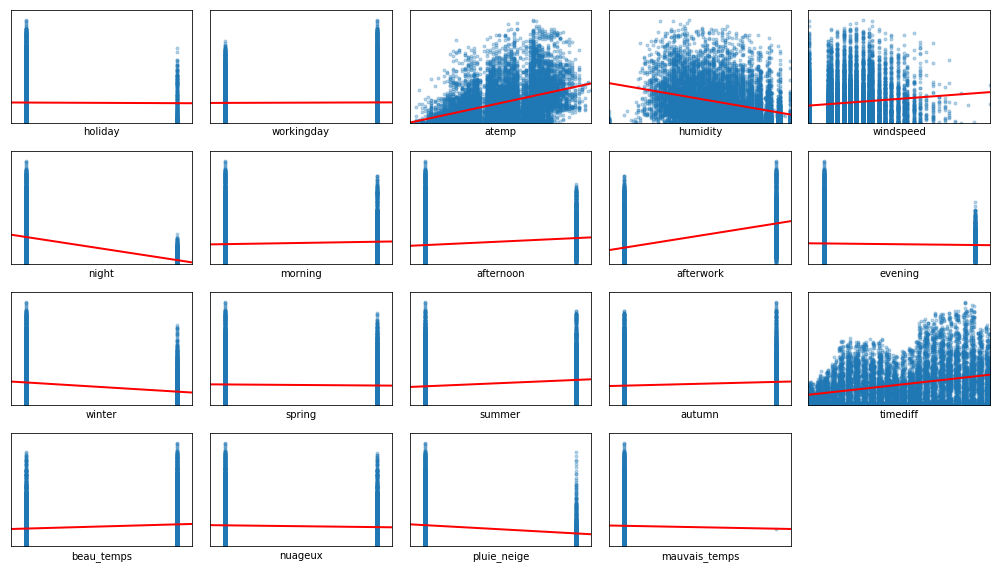

In [116]:
# pour les variables binaires, la droite est tracée entre les valeurs "0"
# et les valeurs "1"

plt.figure(figsize=(14, 8))
y = np.array(data['count'])

for i in range(0, len(feature_list)):
    x = np.array(data[feature_list[i]])[:, np.newaxis]
    mini = float(x.min())
    maxi = float(x.max())
    x_pred = np.linspace(mini-2, maxi+2, 100)[:, np.newaxis]

    plt.subplot(4, 5, i + 1)
    model.fit(x, y)

    plt.plot(x, y, '.', alpha=0.3)
    plt.plot(x_pred, model.predict(x_pred), '-r', linewidth=2)
    plt.xlabel(feature_list[i])
    plt.xlim(x.min()-0.1,x.max()+0.1)
    plt.xticks([])
    plt.yticks([])
    plt.ylim(0, y.max() * 1.1)

plt.tight_layout()
plt.show()

##### ces graphes permettent de se faire une idée de l'influence des différentes colonnes sur la variable count. On peut quantifier l'influence grâce au test de nullité sur les coefficients directeurs.

In [117]:
import statsmodels.api as sm

y = np.array(data['count'])


#x = np.array(dat[feature_list]) #crochets ?
x = [data[feature_list]]
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for i in x[1:]:
        X = sm.add_constant(np.column_stack((i, X)))
    results = sm.OLS(y, X).fit()
    return results

In [118]:
print(reg_m(y, x).summary()) #parler de la colinearité

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     1025.
Date:                Sat, 12 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:41:36   Log-Likelihood:                -67038.
No. Observations:               10886   AIC:                         1.341e+05
Df Residuals:                   10869   BIC:                         1.342e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -8.2009      6.827     -1.201      0.2

#### si l'on regarde les p-value approximativement nulles, on peut rejeter l'hypothèse d'un coefficient directeur nul avec un risque extrêmement faible de se tromper pour les features 3,4,6,7,8,9,10,12,15 qui sont :


In [119]:
for i in (2,3,5,6,7,8,9,11,14):
    print(feature_list[i])

atemp
humidity
night
morning
afternoon
afterwork
evening
spring
timediff


In [120]:
# à noter que la vitesse du vent et la variable "beau temps" on des p-values 
# très faibles également ce qui laisse à penser qu'elles expliquent effectivement la variable count

#### il s'agit ici de décrire rapidement les variables qui semblent influencer la variable "count". Une régression linéaire plus poussée mettrait en évidence des colinéarités entre les features (détectables grâce à l'étude des "vifs"-variance inflation factor- par exemple) et certaines variables devrait être sorties du modèle. 

#### Dans cette première partie nous avons étudié différentes colonnes et affiché différents graphiques permettant de mieux saisir comment la variable count varie en fonction de différents features. Nous avons aussi comparé l'attitude des utilisateurs selon qu'ils sont "casual" ou "registered". 
#### passons maintenant à la prédiction du nombre de vélos loués par heure

# Partie II – MACHINE LEARNING 

## régression linéaire

In [121]:
# création de 24 nouveaux features ("dummy variable") pour les différentes heures. Une colonne par heure.

dummy = pd.get_dummies(data["hour"], prefix="hour", dummy_na=False)
data = data.join(dummy.loc[:, :])


In [122]:
# création de 12 nouveaux features ("dummy variable") pour les 12 mois de l'année

data["mois"]=data["datetime"].apply(lambda x: x.month)
dummy = pd.get_dummies(data["mois"], prefix="mois", dummy_na=False)
data = data.join(dummy.loc[:, :])

In [123]:
data.shape 

(10886, 65)

In [124]:
#data.to_csv("dataquantmetry.csv")

#### 65 features au total mais forcément de fortes colinéarités car, par exemple, l'heure indique si on est la journée ou la nuit (qui sont des features présents dans le dataset) ; le mois indique la saison ; la saison explique en parti la température... On va travailler avec 2 différentes listes de features pour la suite et comparer les performances 

In [125]:
# le nom des 65 features
import math as m
data.columns.values.tolist();

In [126]:
# les features que l'on va utiliser : soit columns1 soit columns2. 
# Mon objectif est de ne pas lancer des modèles de machine learning avec des features qui sont colinéaires.

# column 1 possède les features de base du dataset 
# (inclus ceux que j'ai ajoutés au début) + les dummy variables pour les mois et les horaires
columns1=['holiday','workingday','atemp','humidity','windspeed',
 'beau_temps','nuageux','pluie_neige','timediff','hour_0','hour_1','hour_2','hour_3',
 'hour_4','hour_5','hour_6','hour_7','hour_8','hour_9','hour_10','hour_11',
 'hour_12','hour_13','hour_14','hour_15','hour_16','hour_17','hour_18','hour_19',
 'hour_20','hour_21','hour_22','hour_23','mois_1',
 'mois_2','mois_3','mois_4','mois_5','mois_6','mois_7','mois_8','mois_9',
 'mois_10','mois_11','mois_12',"count"]

# column 2 possède les features de base du dataset + les dummy variables pour la saison et le moment de la journée
columns2=['holiday','workingday','atemp','humidity','windspeed',
 'beau_temps','nuageux','pluie_neige','timediff','night','morning','afternoon','winter','spring',
'summer','autumn',"evening", 'afterwork','temp',"count"]


In [127]:
# les 2 datasets sur lesquels on va tester les algorithmes de machine learning sont donc :
data_ml1=data[columns1] #modèle 1
data_ml2=data[columns2] #modèle 2

In [128]:
data_ml1.head(2)

,holiday,workingday,atemp,humidity,windspeed,beau_temps,nuageux,pluie_neige,timediff,hour_0,...,mois_4,mois_5,mois_6,mois_7,mois_8,mois_9,mois_10,mois_11,mois_12,count
0,0,0,14.395,81,0.0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,16
1,0,0,13.635,80,0.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,40


### split the data : training set et testing test (80/20)

In [129]:
# dans la continuité de ce que l'on a fait précédemment on commence par tester les résultats des régressions linéaires

from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [130]:
train1, test1 = train_test_split(data_ml1, test_size=0.2) # train et test pour le dataset 1
train2, test2 = train_test_split(data_ml2, test_size=0.2) # train et test pour le dataset 2

In [131]:
# features de column 1
y_train1 = train1['count']
x_train1 = train1.drop(['count'], axis=1)
y_test1 = test1['count']
x_test1 = test1.drop(['count'], axis=1)
# features de column 2
y_train2 = train2['count']
x_train2 = train2.drop(['count'], axis=1)
y_test2 = test2['count']
x_test2 = test2.drop(['count'], axis=1)

### linear model

In [132]:
model1=linear_model.LinearRegression()
model2=linear_model.LinearRegression()

In [133]:
# modèle de régression linéaire pour le modèle 1
model1.fit(x_train1,y_train1)
print("les coefficients :\n",model1.coef_,"\n \nintersect :",model1.intercept_)

les coefficients :
 [-6.56292111e+00  1.77186269e+00  4.06189219e+00 -8.57302929e-01
 -4.42747995e-01  7.87225178e+11  7.87225178e+11  7.87225178e+11
  2.44772735e-01 -7.60156834e+08 -7.60156853e+08 -7.60156863e+08
 -7.60156876e+08 -7.60156878e+08 -7.60156860e+08 -7.60156799e+08
 -7.60156660e+08 -7.60156525e+08 -7.60156670e+08 -7.60156724e+08
 -7.60156699e+08 -7.60156659e+08 -7.60156661e+08 -7.60156678e+08
 -7.60156672e+08 -7.60156605e+08 -7.60156444e+08 -7.60156487e+08
 -7.60156595e+08 -7.60156675e+08 -7.60156727e+08 -7.60156762e+08
 -7.60156799e+08  2.43834963e+10  2.43834963e+10  2.43834964e+10
  2.43834964e+10  2.43834964e+10  2.43834964e+10  2.43834963e+10
  2.43834964e+10  2.43834964e+10  2.43834964e+10  2.43834963e+10
  2.43834963e+10] 
 
intersect : -810848517168.3103


#### on remarque que les coefficients des variables binaires sont énormes et ce n'est donc pas satisfaisant.On garde cependant cette sortie pour montrer par la suite comment on peut éviter ce genre de problèmes en rajoutant un regularizer au modèle.
#### ces valeurs  importantes sont dues aux colinéarités de certains features et aussi au fait que les régressions linéaires ne sont pas optimales pour les features qui sont des dummy variables. 
#### la valeur de l'intersect permet cependant d'avoir des résultats cohérents pour le nombre de vélos prédits (cela contrebalance les coefficients en quelque sorte)
#### le problème que pose ces larges valeurs est le risque d'overfitting (et donc d'une mauvaise généralisation du modèle).

In [134]:
# le modèle 2 ne pose pas ce genre de problème
# il y a moins de variables binaires dans le modèle et moins de colinéarité

model2.fit(x_train2,y_train2)
print("les coefficients :\n",model2.coef_,"\n \nintersect :",model2.intercept_)

les coefficients :
 [  -7.06061177    1.68683033    2.79104968   -0.99141694   -0.46998657
  109.17582038   99.47528761   52.78659558    0.23520633 -157.88421302
   18.20136327   15.74280341   -9.18207427   16.31625619  -14.71800515
    7.58382323  -29.45630145  153.39634779    2.92649288] 
 
intersect : -37.50251277087551


#### En regardant les prédictions, j'ai remarqué des valeurs négatives de prédiction, or le minimum de la variable count dans le dataset est 1. On remplace donc les prédictions négatives par 1 (1 vélo loué)

In [135]:
predict1=model1.predict(x_test1)
predict1[predict1<0]=1
predict2=model2.predict(x_test2)
predict2[predict2<0]=1

In [136]:
print("mean squarred error model 1 :",np.mean((predict1-y_test1)**2))
print("mean squarred error model 2 :",np.mean((predict2-y_test2)**2))

mean squarred error model 1 : 9739.84914336719
mean squarred error model 2 : 12084.767896190335


In [137]:
print("pour le modèle 1, valeurs des R² pour les training test et testing test:",model1.score(x_train1,y_train1),model1.score(x_test1,y_test1))
print("pour le modèle 2, valeurs des R² pour les training test et testing test:",model2.score(x_train2,y_train2),model2.score(x_test2,y_test2))

pour le modèle 1, valeurs des R² pour les training test et testing test: 0.6949681550450573 -8632499625449656.0
pour le modèle 2, valeurs des R² pour les training test et testing test: 0.6013612089037432 0.6029029538629502


In [138]:
# erreurs moyennes du modèle en ce qui concerne le nombre de vélos loués 

from sklearn.metrics import mean_absolute_error
print("pour le modèle 1:",mean_absolute_error(predict1,y_test1))
print("pour le modèle 2:",mean_absolute_error(predict2,y_test2))

pour le modèle 1: 70.48786958496542
pour le modèle 2: 79.43699383719766


### l'erreur (écart entre le vrai nombre de vélos et le nombre prédit) est très importante en moyenne et le modèle n'est donc pas satisfaisant du tout. On remarque que certaines prédictions avaient des valeurs négatives, fixons les à 1
### le R² donné par la fonction "score" est cependant autour de 0.6 pour le modèle 2 et 0.69 pour le modèle 1, ce qui montre que la variance de la valeur "count" autour de sa moyenne est bien saisie par le modèle 
### Dans la suite de l'exposé, on va utiliser des regularizers pour empêcher les coefficients de prendre des valeurs trop importantes comme c'était le cas pour le modèle 1

### lasso

In [139]:
# lasso : mettre certains coefficients (ceux des features les moins importants) à 0 
# et empêcher les coefficients de prendre des valeurs trop larges

# model 1
model1 = linear_model.Lasso(alpha=1)
model1.fit(x_train1,y_train1)
print("coefficients model 1 :",model1.coef_)
print("valeur à l'origine model 1 :",model1.intercept_)
print(" ")
#model 2
model2 = linear_model.Lasso(alpha=1)
model2.fit(x_train2,y_train2)
print("coefficients model 2:",model2.coef_)
print("valeur à l'origine model 2:",model2.intercept_)
print(" ")

#On remplace les valeurs négatives des prédictions
predict1=model1.predict(x_test1)
predict1[predict1<0]=1
predict2=model2.predict(x_test2)
predict2[predict2<0]=1

#comparaison des 2 modèles
print("COMPARAISON DES DEUX MODELES \n")
print("model 1:",model1.score(x_train1,y_train1),model1.score(x_test1,y_test1))
print("model 2:",model2.score(x_train2,y_train2),model2.score(x_test2,y_test2))
print(" ")
print(" moyenne des erreurs entre la prédiction et le résultat :")
print("pour le modèle 1:",mean_absolute_error(predict1,y_test1))
print("pour le modèle 2:",mean_absolute_error(predict2,y_test2))

coefficients model 1 : [-0.00000000e+00  0.00000000e+00  5.94817958e+00 -1.51649733e+00
 -5.39948761e-02  1.00795803e+00 -0.00000000e+00 -3.17149728e+01
  2.33295652e-01 -9.94800294e+01 -1.17315835e+02 -1.24907224e+02
 -1.34592532e+02 -1.37026026e+02 -1.20241409e+02 -5.55126382e+01
  2.93642781e+01  1.62539531e+02  1.35333927e+01 -0.00000000e+00
 -0.00000000e+00  9.92222428e+00  5.78588023e+00  0.00000000e+00
  0.00000000e+00  5.91347538e+01  2.22611096e+02  1.81124421e+02
  7.78564456e+01  2.24945541e-01 -0.00000000e+00 -3.30645157e+01
 -6.67993113e+01 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.49861950e+01  0.00000000e+00 -2.05103367e+01
 -9.65060641e+00  0.00000000e+00  5.48452963e+00  0.00000000e+00
 -0.00000000e+00]
valeur à l'origine model 1 : 67.5161975054907
 
coefficients model 2: [-0.00000000e+00  0.00000000e+00  3.44942689e+00 -1.13042546e+00
 -4.14068154e-01  5.91102779e+00  0.00000000e+00 -3.14875099e+01
  2.37138081e-01 -1.67355706e+02  1.39541848

#### Comme prévu, de nombreux features ont des coefficients nuls avec une régression de type lasso

In [140]:
# On choisi arbitrairement une valeur de coefficient de 1 pour le regularizer dans la cellule précédente.
# On vais essayer différents regularizers ici et garder celui qui produit le meilleur score
alphas = np.logspace(-1,4,6)

model1 = linear_model.Lasso()
scores = [model1.set_params(alpha=alpha).fit(x_train1, y_train1).score(x_test1, y_test1) for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
model1.alpha = best_alpha
model1.fit(x_train1, y_train1)
print("meilleur paramètre pour le lasso :",best_alpha)
print(" ")
print(model1.coef_,"\n",model1.score(x_train1,y_train1),model1.score(x_test1,y_test1))
print(' ')
print(" moyenne des erreurs entre la prédiction et le résultat :")
print("pour le modèle 1:",mean_absolute_error(model1.predict(x_test1),y_test1))

meilleur paramètre pour le lasso : 0.1
 
[-3.00527980e+00  1.49219388e+00  4.41634475e+00 -9.26990912e-01
 -4.00474493e-01  1.01201876e+01 -0.00000000e+00 -5.21785337e+01
  2.42794993e-01 -1.47968187e+02 -1.66324741e+02 -1.76048696e+02
 -1.88765714e+02 -1.90553328e+02 -1.73365983e+02 -1.11353419e+02
  2.17683715e+01  1.56378242e+02  1.13729412e+01 -3.88600974e+01
 -1.48487329e+01  1.96725709e+01  1.78698313e+01  0.00000000e+00
  6.51756830e+00  7.35955282e+01  2.34559764e+02  1.92030973e+02
  8.47426743e+01  4.79488538e+00 -4.14795781e+01 -7.68530289e+01
 -1.13261474e+02 -1.29248147e+01 -1.12352535e+01  5.06022909e-04
  1.39495427e+01  4.15322736e+01  1.74840113e+01 -1.10605279e+01
 -5.70740308e+00  1.08328393e+01  1.79236619e+01 -4.04138184e+00
 -1.86802784e+01] 
 0.6946337144956484 0.6855438800484475
 
 moyenne des erreurs entre la prédiction et le résultat :
pour le modèle 1: 76.0835938297444


##### comme prévu certains features ont des coefficients nuls. Le premier coefficient de la liste (qui vaut 0) correspond à la colonne "holiday". Ce n'est pas étonnant que ce coefficient soit nul car l'information est redondante avec celle de la colonne "workingday" et nous avons aussi vu précédemment que ce feature possédait des anomalies (certains jours qui sont des vacances ne sont pas indiqués)


### ridge

In [141]:
# le modèle de regression ridge permet de contrôler la taille
# des coefficients

model1 = Ridge(alpha=0.5) #coefficient du regularizer : 0.5
model1.fit(x_train1,y_train1) 
print(model1.coef_,"\n")
print(" ")
print("modèle 1 score (R²) pour le training set :",model1.score(x_train1,y_train1))
print("modèle 1 score (R²) pour le testing set :",model1.score(x_test1,y_test1))

[-6.55102046e+00  1.80825225e+00  4.07964920e+00 -8.61540546e-01
 -4.43806931e-01  2.55771329e+01  1.45470643e+01 -4.01241972e+01
  2.44674231e-01 -1.25457602e+02 -1.43944761e+02 -1.53895105e+02
 -1.66987067e+02 -1.68747815e+02 -1.51581737e+02 -8.99873468e+01
  4.84192640e+01  1.83107392e+02  3.88552078e+01 -1.54413660e+01
  9.18954843e+00  4.89643868e+01  4.75441795e+01  2.99628106e+01
  3.67976585e+01  1.03544504e+02  2.63957220e+02  2.21225048e+02
  1.13498049e+02  3.33756378e+01 -1.81749232e+01 -5.37727514e+01
 -9.04504324e+01 -2.04194401e+01 -1.80732136e+01 -2.99682881e+00
  1.22089365e+01  4.02620163e+01  1.79803396e+01 -1.16145451e+01
 -7.34712805e+00  1.03276859e+01  1.59326963e+01 -1.02467719e+01
 -2.60137470e+01] 

 
modèle 1 score (R²) pour le training set : 0.6949671477072024
modèle 1 score (R²) pour le testing set : 0.6861683768446316


In [142]:
model2 = Ridge(alpha=0.5)
model2.fit(x_train2,y_train2) 
print(model2.coef_,"\n")
print(" ")
print("modèle 2 score (R²) pour le training set :",model2.score(x_train2,y_train2))
print("modèle 2 score (R²) pour le testing set :",model2.score(x_test2,y_test2))

[  -7.04758281    1.67512399    2.79038546   -0.99299743   -0.46916192
   56.79551666   47.1057617     0.45277922    0.23518418 -157.81685848
   18.22640487   15.72381473   -9.16816329   16.31703317  -14.74538513
    7.59651525  -29.42868159  153.29532047    2.93121153] 

 
modèle 2 score (R²) pour le training set : 0.6013516643397347
modèle 2 score (R²) pour le testing set : 0.6028912500223413


In [143]:
predict1=model1.predict(x_test1)
predict1[predict1<0]=1
predict2=model2.predict(x_test2)
predict2[predict2<0]=1
print(" moyenne des erreurs entre la prédiction et le résultat :")
print("pour le modèle 1:",mean_absolute_error(predict1,y_test1))
print("pour le modèle 2:",mean_absolute_error(predict2,y_test2))

 moyenne des erreurs entre la prédiction et le résultat :
pour le modèle 1: 70.50291786282115
pour le modèle 2: 79.43622431649788


### En utilisant des modèles de régression avec des regularizers (Lasso et Ridge), les valeurs des coefficients qui étaient très larges précédemment ont été diminuées, et certains coefficients ont pris des valeurs nulles grâce à la méthode Lasso. L'intérêt de ces regularizers est d'avoir un modèle robuste et peu sensible à d'éventuels outliers.
### Cependant, la valeur des erreurs moyennes (moyenne des valeurs absolues des différences) est importante et ce quelque soit le modèle de régression utilisée (environ 67 vélos d'écart en utilisant le modèle 1).  
#### On va utiliser un modèle polynomial avec un regularizer dans la suite pour essayer de réduire cette erreur.

### polynomial

In [144]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [145]:
# j'utilise le modèle 2 pour tester le modèle polynomial
model2 = make_pipeline(PolynomialFeatures(3), Ridge(alpha=2)) #ridge
model2.fit(x_train2,y_train2)
print("modèle 2 score (R²) pour le testing set :",model2.score(x_test2,y_test2))
print("modèle 2 score (R²) pour le training set :",model2.score(x_train2,y_train2))

C:\Users\X380\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.47014e-21): result may not be accurate.
  overwrite_a=True).T


modèle 2 score (R²) pour le testing set : 0.7635527356896292
modèle 2 score (R²) pour le training set : 0.8041135358154141


In [146]:
predict2=model2.predict(x_test2)
predict2[predict2<0]=1
print(" moyenne des erreurs entre la prédiction et le résultat :")
print(" pour le modèle 2 :",mean_absolute_error(predict2,y_test2))

 moyenne des erreurs entre la prédiction et le résultat :
 pour le modèle 2 : 58.79387123449929


##### On voit que la moyenne des erreurs a considérablement diminué (de 80 à 58 vélos). Le R² du modèle également, donc le modèle polynomial explique mieux la variable count que le modèle de régression linéaire vu précédemment. Le risque d'un tel modèle est l'overfitting, cependant, utiliser un regularizer permet de se protéger de ce risque. 

#### le modèle polynomial (que l'on a utilisé que pour le modèle 2 car le modèle 1 possède trop de varaible binaire pour qu'un modèle polynomial soit correctement utilisable) a permis de réduire l'erreur moyenne.
#### On va maintenant utiliser un modèle plus puissant d'arbre de décision pour prédire la valeur de la variable count. 

### random forest regressor

In [147]:
from sklearn.ensemble import RandomForestRegressor

In [148]:
## decision tree
Forest1=RandomForestRegressor(n_estimators=200, max_leaf_nodes=20, bootstrap=False)
Forest1.fit(x_train1,y_train1)
print("Score (R²) pour le training set du modèle 1 :",Forest1.score(x_train1,y_train1))
print("Score (R²) pour le testing set du modèle 1 :",Forest1.score(x_test1,y_test1))

Forest2=RandomForestRegressor(n_estimators=200, max_leaf_nodes=20, bootstrap=False)
Forest2.fit(x_train2,y_train2)
print("Score (R²) pour le training set du modèle 2 :",Forest2.score(x_train2,y_train2))
print("Score (R²) pour le testing set du modèle 2 :",Forest2.score(x_test2,y_test2))

Score (R²) pour le training set du modèle 1 : 0.5455693664372517
Score (R²) pour le testing set du modèle 1 : 0.4966592343499893
Score (R²) pour le training set du modèle 2 : 0.6939159965450223
Score (R²) pour le testing set du modèle 2 : 0.6839436122243644


In [149]:
predict1=Forest1.predict(x_test1)
predict1[predict1<0]=1
print(" moyenne des erreurs entre la prédiction et le résultat :")
print(" pour le modèle 1 :",mean_absolute_error(predict1,y_test1))
print(" ")
predict2=Forest2.predict(x_test2)
predict2[predict2<0]=1
print(" moyenne des erreurs entre la prédiction et le résultat :")
print(" pour le modèle 2 :",mean_absolute_error(predict2,y_test2))

 moyenne des erreurs entre la prédiction et le résultat :
 pour le modèle 1 : 101.30667500125845
 
 moyenne des erreurs entre la prédiction et le résultat :
 pour le modèle 2 : 70.88000077677809


#### les erreurs sont encore très larges, le modèle qui suit les réduit grandement

In [150]:
from sklearn.ensemble import GradientBoostingRegressor

In [151]:
# gradient boosting pour le modèle 1
Boosting1=GradientBoostingRegressor(learning_rate=0.1, n_estimators=1000, max_leaf_nodes=50)
Boosting1.fit(x_train1,y_train1)
predict1=Boosting1.predict(x_test1)
predict1[predict1<0]=1
print("R² pour le training set du modèle 1 :",Boosting1.score(x_train1,y_train1))
print("R² pour le testing set du modèle 1 :",Boosting1.score(x_test1,y_test1))
print(" moyenne des erreurs entre la prédiction et le résultat :")
print(" pour le modèle 1 :",mean_absolute_error(predict1,y_test1))

R² pour le training set du modèle 1 : 0.9805545922638343
R² pour le testing set du modèle 1 : 0.9322151005257636
 moyenne des erreurs entre la prédiction et le résultat :
 pour le modèle 1 : 29.391735154968185


##### l'erreur moyenne descend à environ 28 vélos, essayons de faire mieux

#### ajoutons les jours de la semaine et les horaires au modèle 2

In [152]:
columns3=columns2+["dayofweek"]+["hour"]
columns3=list(set(columns3))

data_ml3=data[columns3]
train3, test3 = train_test_split(data_ml3, test_size=0.2)
y_train3 = train3['count']
x_train3 = train3.drop(['count'], axis=1)
y_test3 = test3['count']
x_test3 = test3.drop(['count'], axis=1)

In [153]:
## gradient boosting sur le modèle 2 auquel j'ai ajouté 2 features (jour de la semaine et heure).
## Cela prend près d'une minute sur mon ordinateur
Boosting3=GradientBoostingRegressor(learning_rate=0.05, n_estimators=1000, max_leaf_nodes=85)
Boosting3.fit(x_train3,y_train3)
predict3=Boosting3.predict(x_test3)
predict3[predict3<0]=1
print("R² pour le training set du modèle 1 :",Boosting3.score(x_train3,y_train3))
print("R² pour le testing set du modèle 1 :",Boosting3.score(x_test3,y_test3))
print(" moyenne des erreurs entre la prédiction et le résultat :")
print(" pour le modèle 3 :",mean_absolute_error(predict3,y_test3))

R² pour le training set du modèle 1 : 0.9724193673461959
R² pour le testing set du modèle 1 : 0.9573827730444505
 moyenne des erreurs entre la prédiction et le résultat :
 pour le modèle 3 : 24.556709059565136


#### moins de 26 vélos pour l'erreur moyenne, j'affiche maintenant l'importance des features dans cette classification

<Figure size 432x288 with 0 Axes>

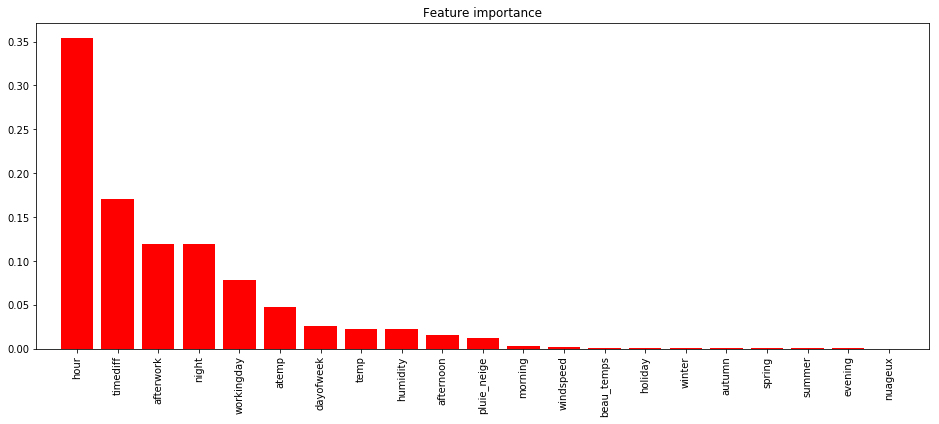

In [154]:
#############

col1=np.array(x_train3.columns.values.tolist())
importances = Boosting3.feature_importances_
indices = np.argsort(importances)[::-1]

# visualisation de l'importance des features
plt.clf()
plt.figure(figsize=(16,6))
plt.title("Feature importance")
plt.bar(range(x_train3.shape[1]), importances[indices],color="r", align="center")
plt.xticks(range(x_train3.shape[1]), col1[indices],rotation=90)
plt.xlim([-1, x_train3.shape[1]])
plt.show()

In [155]:
!pip install plotly

In [156]:
!pip install chart_studio

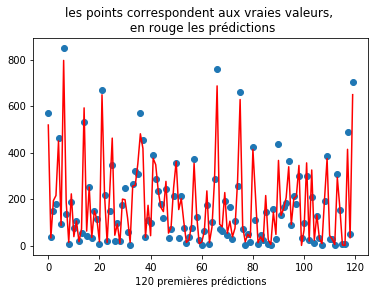

In [157]:
import matplotlib.pyplot as plt
#import plotly.plotly as py
import chart_studio.plotly as py

plt.plot(np.array(y_test3.head(120)),'o')
plt.plot(predict3[0:120],'r')
plt.title("les points correspondent aux vraies valeurs, \n en rouge les prédictions")
plt.xlabel("120 premières prédictions")
plt.show()

#### On teste maintenant tous les features pour le gradient boosting. Cela donne le meilleur résultat. (Cela prend près d'une minute sur mon ordinateur)

In [158]:
# tous les features 
columns3=columns1+["dayofweek"]+["hour"]
columns3=list(set(columns3))

In [159]:
columns3;

In [160]:
data_ml3=data[columns3]
train3, test3 = train_test_split(data_ml3, test_size=0.2)
y_train3 = train3['count']
x_train3 = train3.drop(['count'], axis=1)
y_test3 = test3['count']
x_test3 = test3.drop(['count'], axis=1)

In [161]:
## avec les nombreux features utilisés, cela prend près de 2 minutes
Boosting3=GradientBoostingRegressor(learning_rate=0.05, n_estimators=1000, max_leaf_nodes=85)
Boosting3.fit(x_train3,y_train3)
predict3=Boosting3.predict(x_test3)
predict3[predict3<0]=1
print("R² pour le training set du modèle 1 :",Boosting3.score(x_train3,y_train3))
print("R² pour le testing set du modèle 1 :",Boosting3.score(x_test3,y_test3))
print(" moyenne des erreurs entre la prédiction et le résultat :")
print(" pour le modèle 3 :",mean_absolute_error(predict3,y_test3))

R² pour le training set du modèle 1 : 0.9729157395308565
R² pour le testing set du modèle 1 : 0.9427065349118202
 moyenne des erreurs entre la prédiction et le résultat :
 pour le modèle 3 : 26.764255403470038


<Figure size 432x288 with 0 Axes>

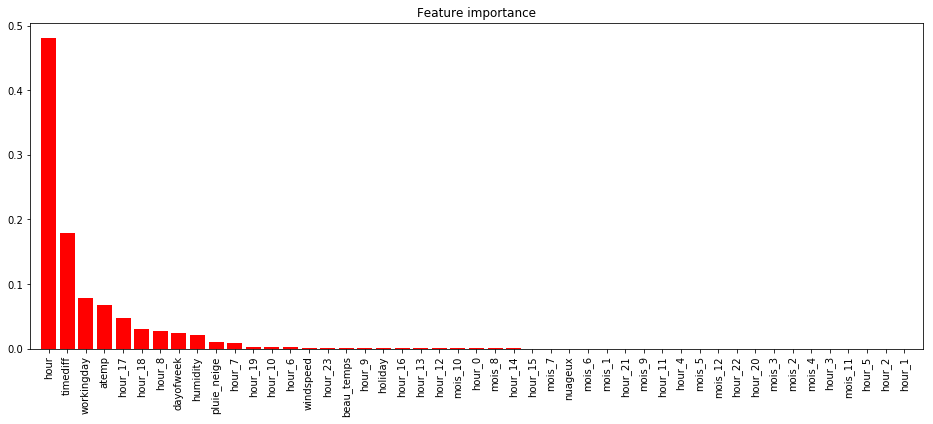

In [162]:
#############

col1=np.array(x_train3.columns.values.tolist())
importances = Boosting3.feature_importances_
indices = np.argsort(importances)[::-1]

# visualisation de l'importance des features
plt.clf()
plt.figure(figsize=(16,6))
plt.title("Feature importance")
plt.bar(range(x_train3.shape[1]), importances[indices],color="r", align="center")
plt.xticks(range(x_train3.shape[1]), col1[indices],rotation=90)
plt.xlim([-1, x_train3.shape[1]])
plt.show()

##### on remarque que ce modèle est très bon en terme de prédiction et de R². 

#### testons cet algorithme sur le modèle 2

### Pour quelles dates a-t-on des erreurs importantes dans les prédictions  ?

In [163]:
# essayons de voir à quelles dates il y a un grand écart (plus de 99 vélos) entre la prédiction
# et la valeur effective
x_test_outlier=pd.DataFrame(columns=(['timediff',"erreurs"]))
y_predict=predict1
j=0
for i in range(0,len(y_test1)):
    error = m.sqrt((y_test1.iloc[[i]]-y_predict[i])**2)
    if error>99:
        #print(error)
        #print(np.array(x_test1["timediff"].iloc[[i]]).tolist()[0])
        x_test_outlier.loc[j]=[np.array(x_test1["timediff"].iloc[[i]])[0],error]      
        j=j+1

In [164]:
x_test_outlier;
groups=x_test_outlier.groupby(["timediff"])
timediff_count=pd.DataFrame(columns=['jour numéro :',"occurence",'erreur moyenne'])
i=0
for key,df in groups:
    timediff_count.loc[i]=[key,df["timediff"].count(),df["erreurs"].mean()]
    i=i+1

In [165]:
timediff_count.max()

jour numéro :     710.000000
occurence           4.000000
erreur moyenne    288.580598
dtype: float64

### quels jours ont des prédictions qui s'éloignent des vraies valeurs à plusieurs moment de la journée ?

In [166]:
# quels jours ont des prédictions qui s'éloignent des vraies valeurs à plusieurs moment de la journée ?
badprediction=timediff_count[timediff_count['occurence']==timediff_count["occurence"].max()]
badprediction_1=timediff_count[timediff_count['occurence']==timediff_count["occurence"].max()-1]

In [167]:
print("pour les jours ci-dessous, il y a %s moments de la journée pour lesquels la prédiction a dépassé 99 vélos d'erreur"%timediff_count["occurence"].max())
badprediction

pour les jours ci-dessous, il y a 4.0 moments de la journée pour lesquels la prédiction a dépassé 99 vélos d'erreur


,jour numéro :,occurence,erreur moyenne
0,105.0,4.0,137.592687
19,442.0,4.0,153.631050


In [168]:
print("pour les jours ci-dessous, il y a %s moments de la journée pour lesquels la prédiction a dépassé 99 vélos d'erreur"%(timediff_count["occurence"].max()-1))
badprediction_1

pour les jours ci-dessous, il y a 3.0 moments de la journée pour lesquels la prédiction a dépassé 99 vélos d'erreur


,jour numéro :,occurence,erreur moyenne
22,463.0,3.0,113.374458
62,641.0,3.0,288.580598
